# TP5 : Support Vector Machine and Recurrent Neural Network

## Preliminaries

Run the script `datasets.py` like you did in the last notebook to load the functions used to generate artificial datasets.

In [120]:
%run datasets.py



<Figure size 432x288 with 0 Axes>

## Support Vector Machine

### Toy dataset

In [121]:
# Create a dataset of 300 points with make_forge()
X, y = make_forge(300)
print("X has", len(X), "points.");

# and split it into a 270 points training set and 
# 30 points test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=42)
print("X_train has", len(X_train), "points.");
print("X_test has", len(X_test), "points.");

X has 300 points.
X_train has 270 points.
X_test has 30 points.


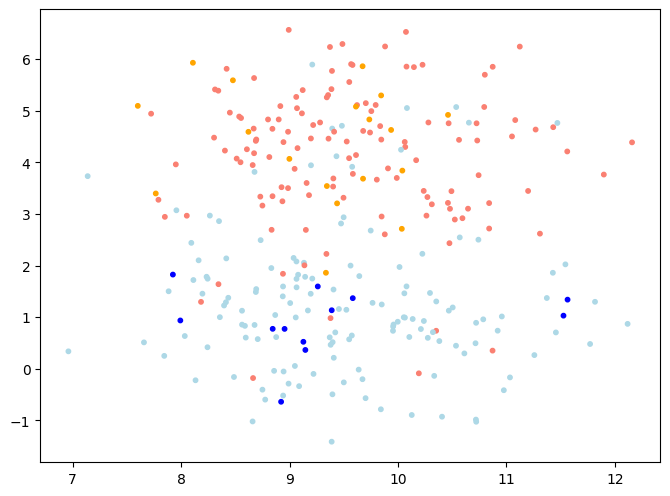

In [122]:
# Print the training points on a 2d figure. Points with
# class 1 should have the color 'salmon' and points with
# the class 0 should have the color 'lightblue'.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)


colors_train = np.where(y_train == 1, "salmon", "lightblue")
colors_test = np.where(y_test == 1, "orange", "blue")


plt.scatter(X_train[:,0], X_train[:,1], c=colors_train, s=10)


# Print the test points on the same figure with color
# 'orange' for class 1 and 'blue' for class 0.

plt.scatter(X_test[:,0], X_test[:,1], c=colors_test, s=10)

plt.show()

The accuracy is  96.66666666666667 %.


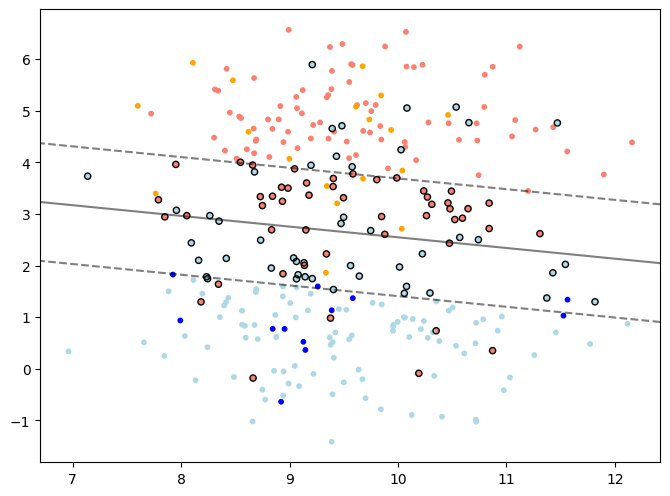

In [123]:
# Create a SVM model for classification with SVC class.
# Use a linear kernel. Train it and evaluate its accuracy

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)

from sklearn.svm import SVC

colors_train = np.where(y_train == 1, "salmon", "lightblue")
colors_test = np.where(y_test == 1, "orange", "blue")

plt.scatter(X_train[:,0], X_train[:,1], c=colors_train, s=10)
plt.scatter(X_test[:,0], X_test[:,1], c=colors_test, s=10)


# SVM model with SVC class
clf = SVC(kernel="linear",C=1000)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("The accuracy is ", accuracy*100, "%.")

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=20,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.show()

In [124]:
%run plots.py
figure = plt.figure()

# Is your dataset linearly separable ?
print("Our dataset is not linearly seperable.")

# Do you think it would be possible to improve the accuracy of the model ? Explain why.
print("I think it would be possible to improve the accuracy by varying the penality.")

Our dataset is not linearly seperable.
I think it would be possible to improve the accuracy by varying the penality.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

The accuracy is 47.5 % for a penality of  0.1 .
The accuracy is 47.5 % for a penality of  0.8 .
The accuracy is 47.5 % for a penality of  2.7 .
The accuracy is 47.5 % for a penality of  6.4 .
The accuracy is 47.5 % for a penality of  12.5 .


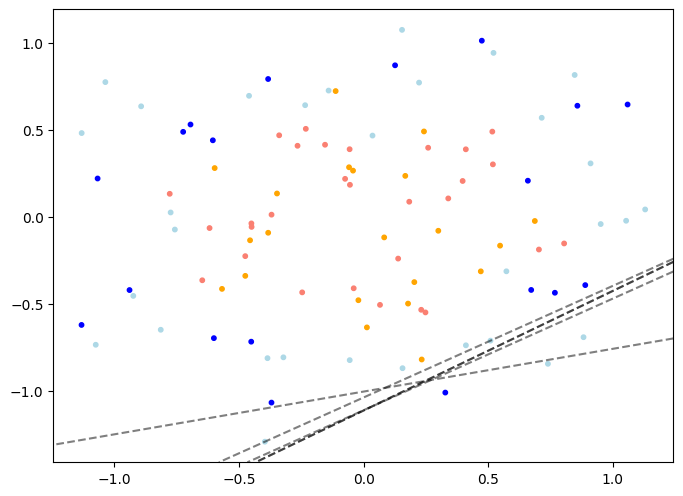

In [134]:
# Train 5 other SVM with a modified value for the penalty
# and plot the decision boundary for each one.
# Explain the effect of this parameter (what happens if we 
# increase/decrease it ?)
# Do you think it can help to prevent underfitting or 
# overfitting ?

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)


from sklearn.svm import SVC

colors_train = np.where(y_train == 1, "salmon", "lightblue")
colors_test = np.where(y_test == 1, "orange", "blue")

plt.scatter(X_train[:,0], X_train[:,1], c=colors_train, s=10)
plt.scatter(X_test[:,0], X_test[:,1], c=colors_test, s=10)


# SVM model with SVC class

for i in range(1,6):
    penality = 0.1*i**3
    
    clf = SVC(kernel="linear", C=penality)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print("The accuracy is", accuracy*100, "% for a penality of ", penality, ".")

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )

plt.show()

### Real case dataset

In [126]:
# Load the breast cancer dataset and train a linear SVC
# model on this dataset. You can create several models and
# adjust the value of the penalty parameter to find the
# optimal one. Can you get a better accuracy than the KNN
# model (it was 0.923?)

# Neural Networks

## Activation functions

The activation function $f$ of a neuron can be linear or non linear. The most used activation functions are :
* sigmoid
* tanh
* ReLu (rectified linear)

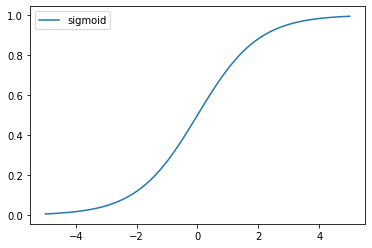

In [127]:
# using the example for sigmoid, plot the representation of
# tanh and ReLu on the same graph. ReLu is defined as:
# ReLu(x) = max(0, x)

import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100)
sigmoid_x = sigmoid(x)

figure = plt.figure()
plt.plot(x, sigmoid_x, label="sigmoid")
plt.legend()
plt.show()

### Tuning a neural network

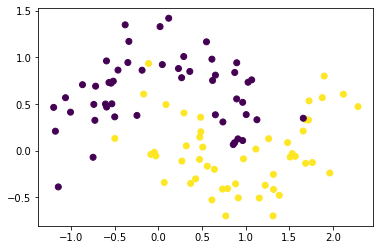

In [128]:
# We use a non linearly separable dataset that looks
# like two moons.
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

As you can see, using a linear SVM does not seem to be the best choice. Let's use neural networks to be able to classify this dataset. First, split the data into a training and a test set.

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=42)

KeyboardInterrupt: 

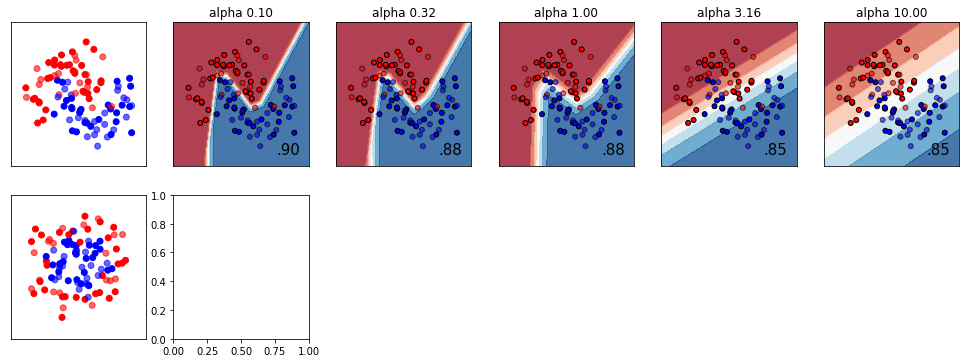

In [130]:
# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import make_pipeline

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[100, 100],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()


In [ ]:
# Create a neural network with all default parameters.
# Compute its accuracy and print its decision boundary
# Do you think the neural network is good ? Explain why.

from sklearn.neural_network import MLPClassifier

# YOUR CODE HERE
clf = MLPClassifier().fit(X_train, y_train)

#clf.score(X_test, y_test, 0.1)



/home/simon/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# There exist different algorithms to train a neural
# network. The default one is called 'adam'. Use the
# documentation to know what are the other kind of
# algorithm. Create other networks with each type of
# algorithm. Which one is the best ?

In [ ]:
# By default, the neural network has only 1 hidden layer of
# 100 neurons. Use the right parameter to create a network
# of 2 hidden layers, each one having 10 neurons.

# Create other networks with different parameters to see if
# many small layers is better than 1 big layer.

In [ ]:
# You can also modify the activation function of the
# neurons in your network. Create a network for each type
# of activation. Which one is the best ?